In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv('Housing.csv')

In [12]:
df.head()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    


price - 0.0%
area - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
stories - 0.0%
mainroad - 0.0%
guestroom - 0.0%
basement - 0.0%
hotwaterheating - 0.0%
airconditioning - 0.0%
parking - 0.0%
prefarea - 0.0%
furnishingstatus - 0.0%


In [16]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [33]:
df.drop_duplicates()

df = df.sort_values(by=['area'], inplace=False, ascending=False)

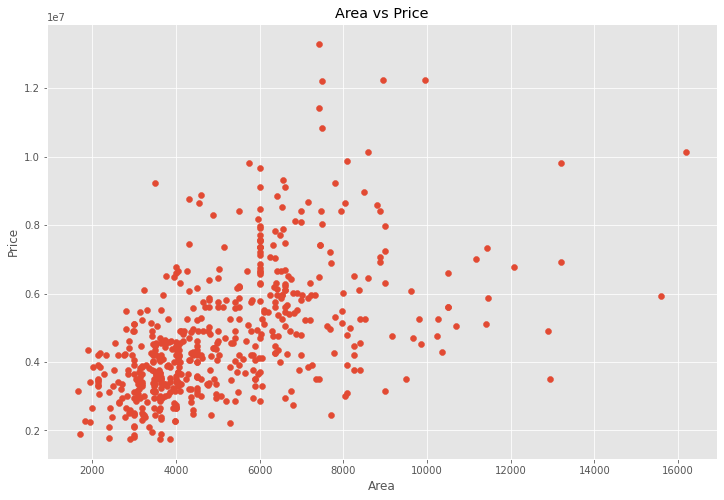

In [28]:
#scatter plot 

plt.scatter(x=df['area'], y=df['price'])

plt.title('Area vs Price')

plt.xlabel('Area')

plt.ylabel('Price')

plt.show()

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished


<AxesSubplot:xlabel='area', ylabel='price'>

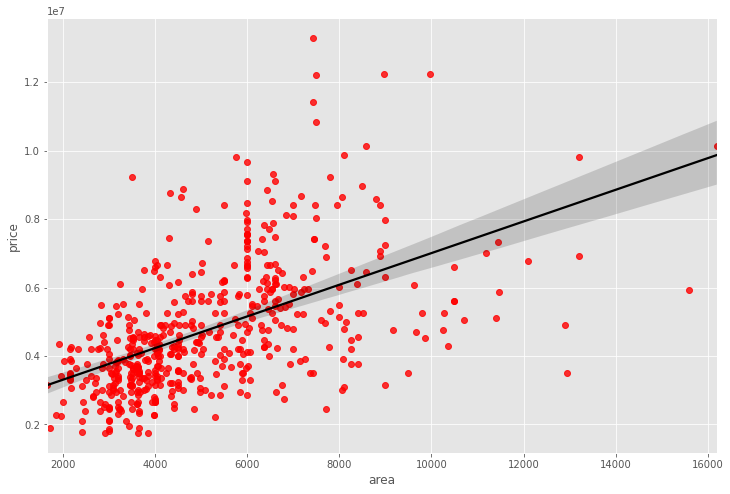

In [31]:
sns.regplot(x='area', y='price', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})

In [35]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


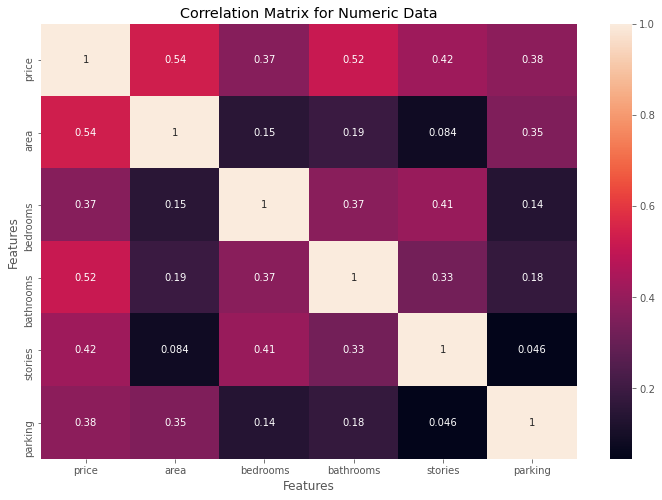

In [38]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Data')

plt.xlabel('Features')

plt.ylabel('Features')

plt.show()

In [39]:
df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,0
403,3500000,12944,3,1,1,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,2
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,1
527,2275000,1836,2,1,1,0,0,1,0,0,0,0,1
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,2


In [41]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,0
403,3500000,12944,3,1,1,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,2
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,1
527,2275000,1836,2,1,1,0,0,1,0,0,0,0,1
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,2


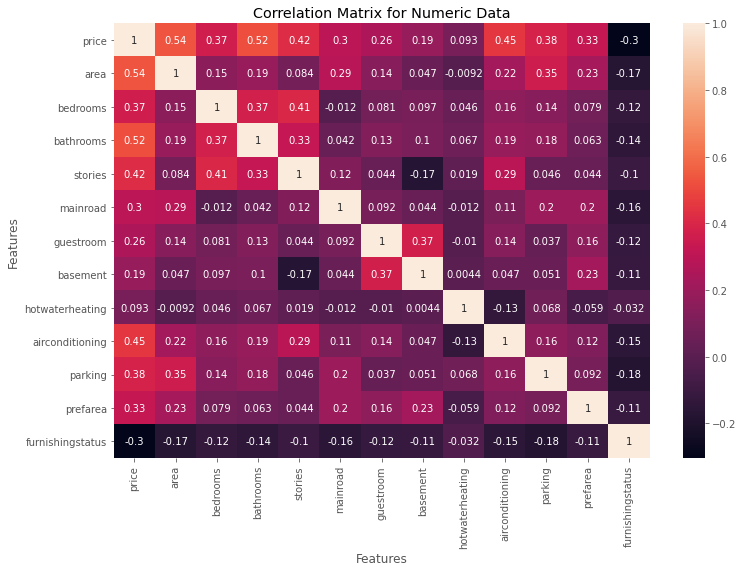

In [42]:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Data')

plt.xlabel('Features')

plt.ylabel('Features')

plt.show()

In [43]:
df_numeric.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [44]:
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

price             price               1.000000
                  area                0.535997
                  bedrooms            0.366494
                  bathrooms           0.517545
                  stories             0.420712
                                        ...   
furnishingstatus  hotwaterheating    -0.031628
                  airconditioning    -0.150477
                  parking            -0.177539
                  prefarea           -0.107686
                  furnishingstatus    1.000000
Length: 169, dtype: float64

In [46]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs


furnishingstatus  price              -0.304721
price             furnishingstatus   -0.304721
parking           furnishingstatus   -0.177539
furnishingstatus  parking            -0.177539
stories           basement           -0.172394
                                        ...   
bathrooms         bathrooms           1.000000
bedrooms          bedrooms            1.000000
area              area                1.000000
prefarea          prefarea            1.000000
furnishingstatus  furnishingstatus    1.000000
Length: 169, dtype: float64

In [49]:
high_corr = sorted_pairs[(sorted_pairs) > 0.35]

high_corr

area              parking             0.352980
parking           area                0.352980
price             bedrooms            0.366494
bedrooms          price               0.366494
guestroom         basement            0.372066
basement          guestroom           0.372066
bedrooms          bathrooms           0.373930
bathrooms         bedrooms            0.373930
parking           price               0.384394
price             parking             0.384394
stories           bedrooms            0.408564
bedrooms          stories             0.408564
stories           price               0.420712
price             stories             0.420712
airconditioning   price               0.452954
price             airconditioning     0.452954
                  bathrooms           0.517545
bathrooms         price               0.517545
area              price               0.535997
price             area                0.535997
                  price               1.000000
guestroom    

AttributeError: 'Series' object has no attribute 'stack'